### 学习源码
- 使用R包的随机森林

In [1]:
library(ggplot2)
library(randomForest)
rfNews()

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
set.seed(1)

In [3]:
train <- read.csv("/media/reallocing/本地磁盘1/KDD2015/Dataset/titanic/train.csv",stringsAsFactors= FALSE)
test <- read.csv("/media/reallocing/本地磁盘1/KDD2015/Dataset/titanic/test.csv",stringsAsFactors= FALSE)

In [4]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [5]:
head(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S


In [6]:
features <- c("Pclass",
                "Age",
                "Sex",
                "Parch",
                "SibSp",
                "Fare",
                "Embarked")

In [7]:
data <- train
fea <- data[,features]
head(fea)

fea1 <- data[features]
head(fea1)


,Pclass,Age,Sex,Parch,SibSp,Fare,Embarked
1,3,22,male,0,1,7.25,S
2,1,38,female,0,1,71.2833,C
3,3,26,female,0,0,7.925,S
4,1,35,female,0,1,53.1,S
5,3,35,male,0,0,8.05,S
6,3,NA,male,0,0,8.4583,Q


,Pclass,Age,Sex,Parch,SibSp,Fare,Embarked
1,3,22,male,0,1,7.25,S
2,1,38,female,0,1,71.2833,C
3,3,26,female,0,0,7.925,S
4,1,35,female,0,1,53.1,S
5,3,35,male,0,0,8.05,S
6,3,NA,male,0,0,8.4583,Q


开始整理特征数据

In [8]:
table(fea$Pclass)
table(fea$Age)
table(fea$Sex)
table(fea$Parch)
table(fea$SibSp)
table(fea$Fare)
table(fea$Embarked)


  1   2   3 
216 184 491 


0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 


female   male 
   314    577 


  0   1   2   3   4   5   6 
678 118  80   5   4   5   1 


  0   1   2   3   4   5   8 
608 209  28  16  18   5   7 


       0   4.0125        5   6.2375   6.4375     6.45   6.4958     6.75 
      15        1        1        1        1        1        2        2 
  6.8583     6.95    6.975   7.0458     7.05   7.0542    7.125   7.1417 
       1        1        2        1        7        2        4        1 
   7.225   7.2292     7.25   7.3125   7.4958   7.5208     7.55   7.6292 
      12       15       13        1        3        1        4        1 
    7.65    7.725   7.7292   7.7333   7.7375   7.7417     7.75    7.775 
       4        1        1        4        2        1       34       16 
  7.7875   7.7958      7.8   7.8292   7.8542    7.875   7.8792   7.8875 
       1        6        1        2       13        1        4        1 
  7.8958    7.925   8.0292     8.05   8.1125   8.1375   8.1583      8.3 
      38       18        1       43        1        1        1        1 
  8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833 
       1        1        1        1        1      


      C   Q   S 
  2 168  77 644 

In [9]:
fea$Age[is.na(fea$Age)] <- -1 #将age为空的置为-1;
head(fea)

,Pclass,Age,Sex,Parch,SibSp,Fare,Embarked
1,3,22,male,0,1,7.25,S
2,1,38,female,0,1,71.2833,C
3,3,26,female,0,0,7.925,S
4,1,35,female,0,1,53.1,S
5,3,35,male,0,0,8.05,S
6,3,-1,male,0,0,8.4583,Q


In [10]:
fea$Fare[is.na(fea$Fare)] <- median(fea$Fare, na.rm=TRUE)
fea$Embarked[fea$Embarked==""] = "S"

In [11]:
fea$Embarked <-  as.factor(fea$Embarked)
fea$Sex <- as.factor(fea$Sex)   #将每个字符串变量中的引号去掉,即'Q'---> Q

#### 将上述特征处理过程整理成为函数

In [12]:
extractFeatures <- function(data) {
  features <- c("Pclass",
                "Age",
                "Sex",
                "Parch",
                "SibSp",
                "Fare",
                "Embarked")
  fea <- data[,features]
  fea$Age[is.na(fea$Age)] <- -1
  fea$Fare[is.na(fea$Fare)] <- median(fea$Fare, na.rm=TRUE)
  fea$Embarked[fea$Embarked==""] = "S"
  fea$Sex      <- as.factor(fea$Sex)
  fea$Embarked <- as.factor(fea$Embarked)
  return(fea)
}

In [13]:
rf <- randomForest(extractFeatures(train),as.factor(train$Survived),ntree = 100,importance = TRUE)

In [14]:
submission <- data.frame(PassengerId = test$PassengerId)
submission$Survived <- predict(rf,extractFeatures(test))
submission$Survived
table(submission$Survived)

[1] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 [38] 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 [75] 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
[112] 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[149] 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
[186] 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
[223] 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
[260] 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
[297] 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
[334] 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
[371] 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
[408] 0 1 1 1 1 0 0 1 0 0 1
Levels: 0 1


  0   1 
286 132 

In [15]:
write.csv(submission,file = '1_randomForest_submission.csv',row.names = FALSE)

In [16]:
imp <- importance(rf, type=1)
imp
featureImportance <- data.frame(Feature=row.names(imp), Importance=imp[,1])

,MeanDecreaseAccuracy
Pclass,17.7042932417398
Age,11.3971209023897
Sex,36.9924215366924
Parch,12.7248568926934
SibSp,8.42949726047631
Fare,14.8366477238931
Embarked,8.47618330124627


In [17]:
p <- ggplot(featureImportance, aes(x=reorder(Feature, Importance), y=Importance)) +
     geom_bar(stat="identity", fill="#53cfff") +
     theme_light(base_size=20) +
     coord_flip() +  
     xlab("Features") +
     ylab("Importance") + 
     ggtitle("Random Forest Feature Importance\n") +
     theme(plot.title=element_text(size=18))

#coord_flip() + 是用来将垂直改为水平.

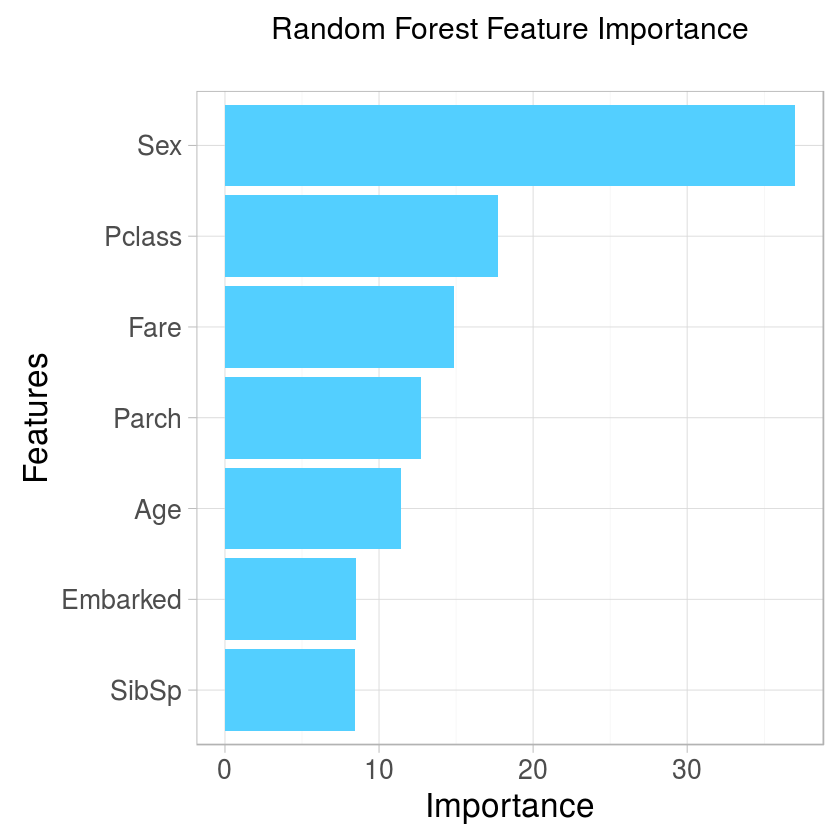

In [18]:
p

In [19]:
ggsave("2_feature_importance.png", p)

Saving 7 x 7 in image
